____future____

make the target the next day close 
the things we use to predict that close as the previous day close and open

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

In [282]:
df = pd.read_csv("/Users/zachadams/Stocks/stockCSV/AAPL.csv")
df

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-03-13,264.89,279.92,252.95,277.97,89803440.0
1,2020-03-12,255.94,270.00,248.00,248.23,104618517.0
2,2020-03-11,277.39,281.22,271.86,275.43,64094970.0
3,2020-03-10,277.14,286.44,269.37,285.34,71322520.0
4,2020-03-09,263.75,278.09,263.00,266.17,71686208.0
...,...,...,...,...,...,...
5028,2000-03-17,120.12,125.00,119.62,125.00,2723600.0
5029,2000-03-16,117.31,122.00,114.50,121.56,3375900.0
5030,2000-03-15,115.62,120.25,114.12,116.25,3960800.0
5031,2000-03-14,121.22,124.25,114.00,114.25,3826600.0


In [283]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

Text(0.5, 0, 'starting')

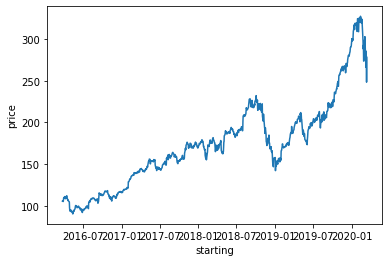

In [284]:
plt.plot(df['date'][:1000],df['4. close'][:1000])
plt.ylabel("price")
plt.xlabel("starting")

In [285]:
print("APPL chart from ", df['date'][1000])

APPL chart from  2016-03-23 00:00:00


In [286]:
X = df.drop('4. close', axis = 1)
X = X.drop('date', axis = 1)
X = X.drop('5. volume', axis = 1)v
X

,1. open,2. high,3. low
0,264.89,279.92,252.95
1,255.94,270.00,248.00
2,277.39,281.22,271.86
3,277.14,286.44,269.37
4,263.75,278.09,263.00
...,...,...,...
5028,120.12,125.00,119.62
5029,117.31,122.00,114.50
5030,115.62,120.25,114.12
5031,121.22,124.25,114.00


In [287]:
y = df['4. close']
y

0       277.97
1       248.23
2       275.43
3       285.34
4       266.17
         ...  
5028    125.00
5029    121.56
5030    116.25
5031    114.25
5032    121.31
Name: 4. close, Length: 5033, dtype: float64

In [288]:
X_train = X[500:]
X_test = X[:500]
y_train = y[500:]
y_test = y[:500]

In [363]:
mdl = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = "distance", algorithm = "auto")
mdl.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [364]:
y_pred = mdl.predict(X_test)

In [365]:
from sklearn.metrics import mean_squared_error as mse

In [366]:
mse(y_pred,y_test)

4.119376362492409

In [330]:
pred_df = df.copy(deep = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'date')

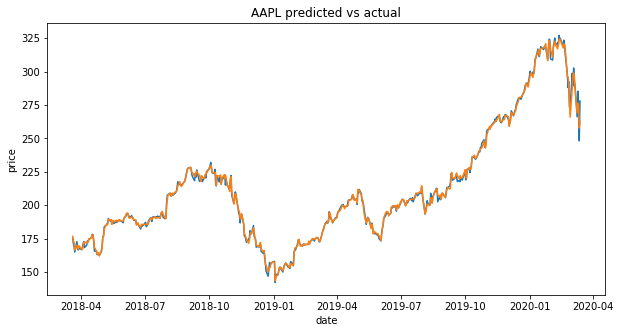

In [369]:
plt.figure(figsize = (10,5))
plt.title(label = "AAPL predicted vs actual")
pred_df['4. close'][:500] = y_pred
plt.plot(df['date'][:500], df['4. close'][:500])
plt.plot(pred_df['date'][:500], pred_df['4. close'][:500])
plt.ylabel("price")
plt.xlabel("date")

In [349]:
pred_df['4. close'][:500]

0      262.710927
1      257.834286
2      275.849493
3      276.448397
4      269.153075
          ...    
495    169.970534
496    166.414176
497    172.602835
498    172.693213
499    176.671588
Name: 4. close, Length: 500, dtype: float64

In [350]:
df['4. close'][:500]

0      277.97
1      248.23
2      275.43
3      285.34
4      266.17
        ...  
495    172.77
496    164.94
497    168.85
498    171.27
499    175.24
Name: 4. close, Length: 500, dtype: float64